# Logistic Regression for Binary Classification

As part of the coursework in DA623 (Computing with Signals) IIT Guwahati, this notebook provides a tutorial on the famous logistic regression algorithm used for classification tasks.

This tutorial assumes very elementary background knowledge of the reader, and explains concepts from the basics as much as possible. However, it is highly recommended that the reader familiarizes themselves with linear regression before jumping into this tutorial.

### Introduction

The simplest one line definition of logistic regression would be:

`"Logistic Regression is a supervised learning algorithm for classification"`

But, let's break down every term for a better understanding:
- `supervised learning`: In machine learning, typically 3 types of tasks are encountered:
    1. Supervised Learning
    2. Unsupervised Learning
    3. Reinforcement Learning

    The most commonly encountered being supervised learning. In supervised learning, we are provided data ($x$) along with labels ($y$). Based on these, we aim to learn the relationship between $x$ and $y$. More formally, we try to find the best hypothesis function $\hat{f}$ that fits the data, i.e., $y = \hat{f}(x)$. We call $\hat{f}$ as hypothesis function, since we assume the type of relation between $x$ and $y$, say polynomial. Note: the actual underlying relationship between $x$ and $y$ is unknown to us, and may not be the same type as the hypothesis function. This function is also called target function $f$ such that $y = f(x)$. This might've been a hyperbola instead of polynomial. We just dont know.

- `classification`: The labels provided in supervised learning may be a continuous variable (eg: temperature of a city) or a discrete variable (eg: blood group types). When the labels are continuous, we call it a regression algorithm. On the other hand, when the variables are discrete, we call it a classification algorithm. In our case, we are performing binary classification, i.e., our labels are discrete and further has only 2 values (eg: male or female, true or false).

Note: Logistic Regression unlike the name suggests is always a classification algorithm, not a regression algorithm.

### Hypothesis Function

For the sake of simplicity, let us consider the case when we have 1D data ($x$). Being an instance of binary classification, these data points each would have one of the 2 labels, namely ($y = 0$ and $y = 1$).

Let us try to fit a straight line, say $\hat{y} = w_0 + w_1x$ to the given data, similar to linear regression. The situation would look something like this:

<div align="center">
<img src="images/linear_regression.png">
</div>

However, in our case of binary classification, we would like $y$ to be between 0 and 1. Hence, we use a sigmoid function. A sigmoid function looks as follows:

<div align="center">
<img src="images/sigmoid_function.png">
</div>

Hence, on setting $z = \hat{y} = w_0 + w_1x$, we get $z \to 1$ for large values of $\hat{y}$, and $z \to 0$ for small values of $\hat{y}$. Accordingly, if $\hat{y} = \phi(z)$, where $z = w_0 + w_1x$ represents the hypothesis function for logistic regression on the given data $x$, we get the following:

<div align="center">
<img src="images/logistic_regression.png">
</div>

But again one piece of the puzzle remains left out, the labels $\hat{y}$ must be 0 or 1, not between 0 and 1. Here comes the concept of decision boundary. More formally, the hypothesis function $\phi(z)$ is not actually the labels $\hat{y}$, but is the probability of a given data point being 1, i.e., $\phi(z) = \phi(w_0 + w_1x) = P(\hat{y} = 1 | x)$.

Thereby, we set a threshold probability, say $p_0$ also known as the decision boundary. Whenever we get $\phi(z) \ge p_0$ for a point $x$, we classify it as 1, i.e., $\hat{y} = \hat{f}(x) = 1$, else if $\phi(z) < p_0$, we set $\hat{y} = \hat{f}(x) = 0$.

For example, with $p_0 = 0.5$, the decision boundary looks as follows (Note: Axes are visible only in VS code light mode):

<div align="center">
<img src="images/decision_boundary.webp">
</div>


#### Some Interesting Facts

Logistic Regression can be used for binary classification of multi dimensional. For example, we get the following decision boundary for 2D data, where $x1$ and $x2$ are the two dimensions, and blue circle represents label $y = 0$ and red cross represents label $y = 1$:

<div align="center">
<img src="images/binary_2d.png">
</div>

In fact, logistic regression can also be used to fit data points belonging to more than 3 classes. Consider a label $\hat{y}$ can be $y_1, y_2,$ or $y_3$. Then for every data point $x$ we fit 3 decision boundaries using $p_0^1, p_0^2, p_0^3$ on hypothesis functions $\phi_1(x), \phi_2(x), \phi_3(x)$, i.e., $P(y_1 = 1|x), P(y_2 = 1|x), P(y_3 = 1|x)$ respectively. Thereby, the label $\hat{y}$ for $x$ is that with largest probability. We can visualize in 2D as follows:

<div align="center">
<img src="images/multiclass_2d.png">
</div>

Last but not least, logistic regression can also learn non linear decision boundaries. Suppose $z = w_0 + w_1x_1 + w_2x_2 + w_3x_1^2 + w_4x_2^2$ for 2D data, we get the following decision boundary:

<div align="center">
<img src="images/non_linear_boundary.jpeg">
</div>

Backtracking to our original problem at hand, i.e., logistic regression for binary classification, we get the following equations for computing hypothesis function and labels for n dimensional data:

$$
z = \sum_{i=0}^n w_ix_i = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n
$$

$$
z = \textbf{w}^T  \textbf{x}
$$

$$
\phi(z) = \frac{1}{1 + e^{-z}} = \frac{1}{1 + e^{-\textbf{w}^T  \textbf{x}}}
$$

Therefore, for $i$ th data point, say $x_i$, we get label as:

$$
\hat{y}_i = \hat{f}(x_i) = \begin{cases} 1, &\quad\text{if }\phi(\textbf{w}^T  \textbf{x}_i) \ge p_0\\ 0, &\quad\text{if }\phi(\textbf{w}^T  \textbf{x}_i) < p_0\\ \end{cases}
$$

where $p_0$ is a threshold probability used to define the decision boundary.

### Cost Function

We get different hypothesis function, and as a result different decision boundaries for different choices of weights $\textbf{w}$. As a result, it becomes necessary to choose an appropriate $\textbf{w}$ so that we get accurate prediction of labels by our logistic regression classifier.

Consequently, we define a cost function $J(w)$ such that minimizing it leads to better accuracy.

An obvious candidate for $J(w)$ is the famous root mean squared error loss function used in linear regression, i.e:

$$
Cost = J(\textbf{w}) = \frac{1}{2N} \sum_{i=1}^N (y_i - \hat{y}_i)^2
$$

where $y_i$ is the true label and $\hat{y}_i$ in this discussion is the likelihood probability obtained using the sigmoid function by our logistic regression classifier.

However, the above cost function may lead to suboptimal results during gradient descent (shortly explained ahead) due to non convexity.

Consequently, we adopt the following cost function:

$$
Cost = J(\textbf{w}) = -\sum_{i=1}^N (y_i\log(\hat{y}_i) + (1 - y_i)\log(1 - \hat{y}_i))
$$

It can be seen that the above indeed works. 

When $y_i = 1$, Cost = $-\log(\hat{y}_i)$. Cost tends to 0 as $\hat{y}_i$ tends to 1. Similarly, cost tends to $\infty$ as $\hat{y}_i$ tends to 0.

When $y_i = 0$, Cost = $-\log(1 - \hat{y}_i)$. Cost tends to 0 as $\hat{y}_i$ tends to 0. Similarly, cost tends to $\infty$ as $\hat{y}_i$ tends to 1.

<div align="center">
<img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExMmp1dmZhcml1N2xscXZldHVnNW43d21lemNueXhzNG83MmR5OTdnNCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/lPF1CyJXXcTZmUrP2J/giphy.gif">
</div>

### Gradient Descent

We are almost there! Now that we have our cost function, we would like to find weights $\textbf{w}$ such that our cost function is minimized.

The gradient descent algorithm does exactly that. A convex looks for 2D data looks as follows (ignore the axes for now):

<div align="center">
<img src="images/convex_function.png">
</div>

Such a function has only 1 local minima which is also the global minima. Now, if we take a particular point, the gradient $\nabla\textbf{J} = \left[\frac{\partial\textbf{J}}{\partial w_1}, \frac{\partial\textbf{J}}{\partial w_2}\right]$ gives the direction of steepest accent. Consequently, updating $\textbf{w}$ in the direction of $-\nabla\textbf{J}$ results in the highest decrease of the cost function. So, we perform the following until we reach the global maxima:

$$
\forall \,i\,\  w_i = w_i - \alpha\frac{\partial\textbf{J}}{\partial w_i}
$$

where $i$ is the $i$ th dimension, and we perform all updations simultaneously.

In our case with our choice of the cost functiion, the gradients are:

$$
\forall \,i\,\  \frac{\partial\textbf{J}}{\partial w_i} = \frac{1}{N}\sum_{j=0}^N (\phi(\textbf{w}^Tx^{(j)}) - y^{(j)})x_i^{(j)}
$$

In the above equation $\alpha$ represents the learning rate parameter. For small values of $\alpha$, gradient descent requires too much time (iterations) until it converges to the global minima. On the other hand, for large values of $\alpha$, gradient descent may result in a very big updation of $w_i$ in the direction of the global minima, that it may overshoot the minima, and result in divergence to a high value of cost.

Suppose, a function is non convex, it looks something like follows:

<div align="center">
<img src="images/non_convex_function.png">
</div>

As a result different starting points may lead to different local minimas (possibly not the global minima).

Hence, it was necessary to choose a different cost function for logistic regression, since root mean square error is not a convex function for logistic regression.

<div align="center">
<img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExZmFwODNhNHJvdmw3OTl0a3Y3N2cyeXl0c2g4Z2tidm81dW93YWZxZiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/Fgl9vJp70G6YJlVOHH/giphy.gif">
</div>

### Implementation

##### Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

##### Loading and Visualizing Dataset

We use the famous breast cancer dataset of sklearn to demonstrate logistic regression. It comprises malignant and benign breast cancer data with 30 corresponding features for each data point.

In [2]:
data = load_breast_cancer()
print('Keys available in the data: ', data.keys())
print('Data Features: \n', data.feature_names)

Keys available in the data:  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Data Features: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [3]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['labels'] =  data.target_names[data.target]

print('Data Shape: ', df.shape)
print('No. of Samples: ', df.shape[0])
print('No. of Features: ', df.shape[1] - 1)

print(df.head())

Data Shape:  (569, 31)
No. of Samples:  569
No. of Features:  30
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  

In [4]:
print ("Total number of labels: " + str(df.shape[0]) + "\n" + "Malignat: " + str(df.labels.value_counts()['benign']) + "\n" + "Benign: " + str(df.labels.value_counts()['malignant']))

Total number of labels: 569
Malignat: 357
Benign: 212


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

##### Data Preprocessing

We normalize the data using `StandardScaler` to ensure that data of all features are on the same scale. This also helps gradient descent in quick convergence. It can be seen more clearly as follows:

<div align="center">
<img src="images/scale_gradient_descent.png">
</div>

In [6]:
X = data.data
y = data.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##### Data Splitting

We split the available data for training and testing in 80:20 ratio.
We need to keep some data aside for testing. If all data is used in training, the test error will most likely always be zero. On the other hand if too much data is kept for testing, it may lead to poor results (train error) due to very less training, i.e., the model has seen very few data points to learn the target function/true labels.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

##### Model

In [8]:
# Function to compute the sigmoid (phi) function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [9]:
# Function to compute the cost function
def compute_cost(X, y, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    cost = (-1 / m) * np.sum((y * np.log(h)) + ((1 - y) * np.log(1 - h)))
    return cost

In [10]:
# Function to perform gradient descent
def gradient_descent(X, y, weights, learning_rate=0.01, num_iterations=1000):
    m = len(y)
    train_costs = []
    test_costs = []
    best_test_error = float('inf')
    best_iteration = 0
    best_weights = None

    for i in range(num_iterations):
        h = sigmoid(np.dot(X, weights))
        gradient = np.dot(X.T, (h - y)) / m
        weights -= learning_rate * gradient
        train_cost = compute_cost(X, y, weights)
        test_cost = compute_cost(X_test, y_test, weights)
        train_costs.append(train_cost)
        test_costs.append(test_cost)

        if test_cost < best_test_error:
            best_test_error = test_cost
            best_iteration = i
            best_weights = weights.copy()
        
    return best_weights, best_iteration, train_costs, test_costs

In [11]:
# Function to predict the class labels
def predict(X, weights, threshold=0.5):
    predictions = sigmoid(np.dot(X, weights))
    predictions[predictions >= threshold] = 1
    predictions[predictions < threshold] = 0
    return predictions

##### Adding a term for $w_0$

While computing $z = \sum_{i=0}^N w_ix_i = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n$, we assume that all $x_0 = 1$. However, our dataset doesn't contain such a feature. Hence we explicitly add a column with all 1's in the data. 

In [12]:
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

print(X_train)

[[ 1.         -1.44798723 -0.45602336 ...  0.91959172  2.14719008
   1.85943247]
 [ 1.          1.97750799  1.69418666 ...  2.6752184   1.9368786
   2.46346488]
 [ 1.         -1.40708919 -1.26351565 ... -0.97048581  0.61676962
   0.05287682]
 ...
 [ 1.          0.04621146 -0.57470379 ... -1.23756033 -0.71628161
  -1.26047806]
 [ 1.         -0.04183295  0.07687501 ...  1.03683652  0.45013821
   1.19444266]
 [ 1.         -0.5530585   0.28631105 ... -0.61357437 -0.33448538
  -0.84042616]]


##### Initializing Parameters and Hyperparameters

In [13]:
weights = np.zeros(X_train.shape[1])
learning_rate = 0.01
num_iterations = 1000

##### Training of Logistic Regression Model

In [14]:
best_weights, best_iteration, train_costs, test_costs = gradient_descent(X_train, y_train, weights, learning_rate, num_iterations)

##### Making Predictions

We make predictions, i.e., assign labels for the test data using the trained weight parameters for the hypothesis function with the lowest test error.

In [15]:
y_pred = predict(X_test, best_weights)

### Results

##### Plot of train and test errors v/s iterations

Iteration with Lowest Test Error: 1000


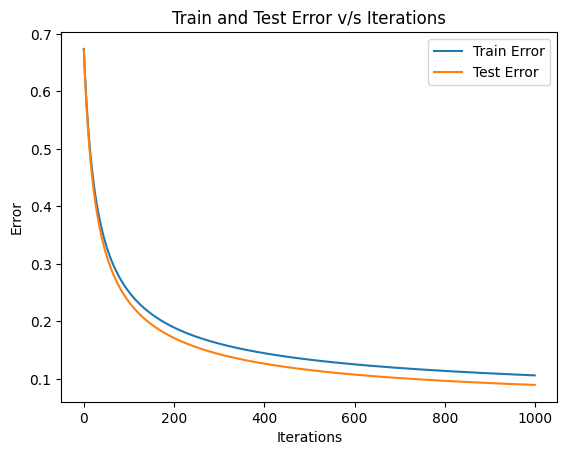

In [16]:
print('Iteration with Lowest Test Error:', best_iteration + 1)

plt.plot(train_costs, label='Train Error')
plt.plot(test_costs, label='Test Error')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Train and Test Error v/s Iterations')
plt.legend()
plt.show()

##### Accuracy

In [17]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)

Accuracy: 0.9912280701754386


##### Confusion Matrix

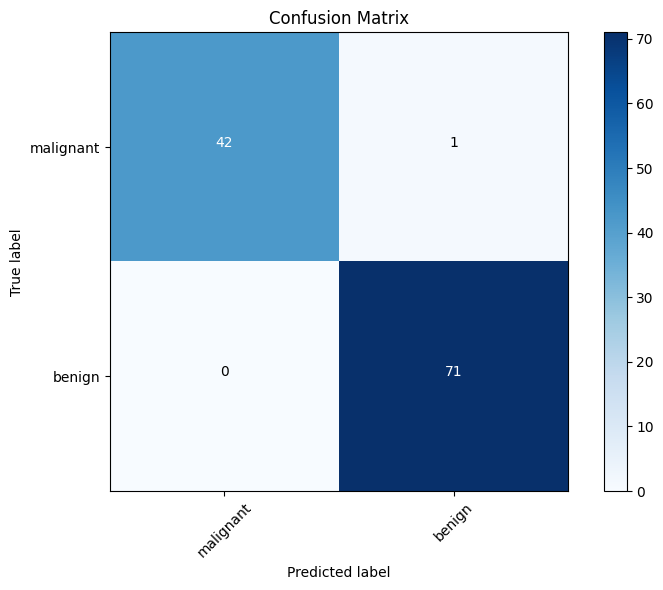

In [18]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(data.target_names))
plt.xticks(tick_marks, data.target_names, rotation=45)
plt.yticks(tick_marks, data.target_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Displaying the values inside the plot
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.show()